In [57]:
import numpy as np
from numpy import random as np_rand
from numpy.linalg import inv, eigh
from numpy import array, flip
from numpy import argwhere as aw
from sklearn.datasets import make_circles, make_moons
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

import kernels as kernel

In [52]:
def k1(x,y):
    return kernel.linear(x,y)

def k2(x,y):
    return kernel.polynomial(x,y,r=1,n=2)

def k3(x,y):
    return kernel.rbf(x,y,sig=1)

def k4(x,y):
    return kernel.tanh(x,y,kap=1,tht=0.5)

def kpca(X,k): # Kernel PCA
    N = X.shape[0]
    K = np.zeros((N,N))
    for ii in range(N):  # Calculate Kernel matrix
        for jj in range(N):
            K[ii,jj] = k(X[ii,:],np.transpose(X[jj,:]))
    
    k_vals, k_vecs = eigh(K)
    k_vals = flip(k_vals,0)  # Sort in decreasing order
    k_vecs = flip(k_vecs,1)  # Sort in decreasing order
    
    for ii in range(N):      # Normalize the eigenvectors
        k_vecs[:,ii] = k_vecs[:,ii]/(k_vals[ii]**(1/2))
    
    return k_vals, k_vecs, K

/home/kearns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


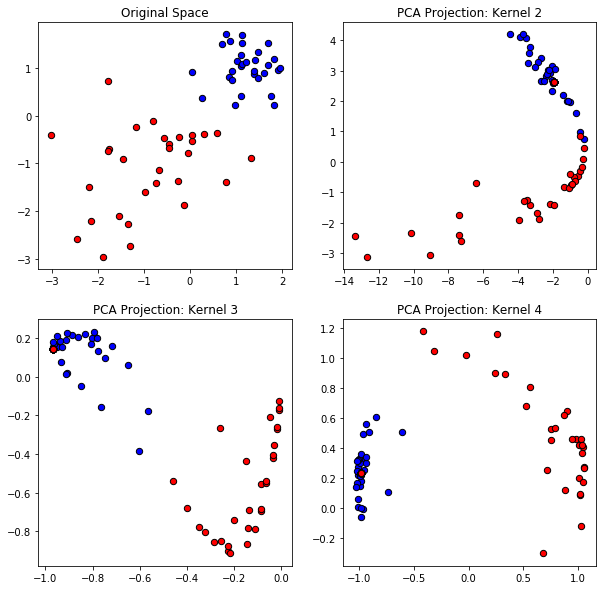

In [60]:
n_p = 30           # Set number of scatter data
n_m = 30

# Create scatter data
x_p = np_rand.normal(1,.5,(n_p,2))
x_m = np_rand.normal(-1,1,(n_m,2))
x = np.vstack((x_p,x_m))
y = np.vstack((np.ones((n_p,1)),np.zeros((n_m,1))))

fig, ax = plt.subplots(2, 2, figsize=(10,10))

# Plot original data
ax[0,0].scatter(x_p[:,0],x_p[:,1],c="blue",s=40,edgecolor='k');
ax[0,0].scatter(x_m[:,0],x_m[:,1],c="red",s=40,edgecolor='k');
ax[0,0].set_title("Original Space");

reds  = y == 0  # Color by labels
blues = y == 1

# plot the various projections by kernel PCA
for ii, k in enumerate([k2, k3, k4]):
    ii += 1
    vals, vecs, K = kpca(x,k);  # Perform Kernel PCA, return K matrix and eigenvecs/vals
    X_kpca = K@vecs;   
    
    ax[ii//2, ii%2].set_title('PCA Projection: Kernel %d'%(ii+1))
    ax[ii//2, ii%2].scatter(X_kpca[aw(blues==True), 0], X_kpca[aw(blues==True), 1],c="blue",s=40,edgecolor='k')
    ax[ii//2, ii%2].scatter(X_kpca[aw(reds==True), 0], X_kpca[aw(reds==True), 1],c="red",s=40,edgecolor='k');

/home/kearns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


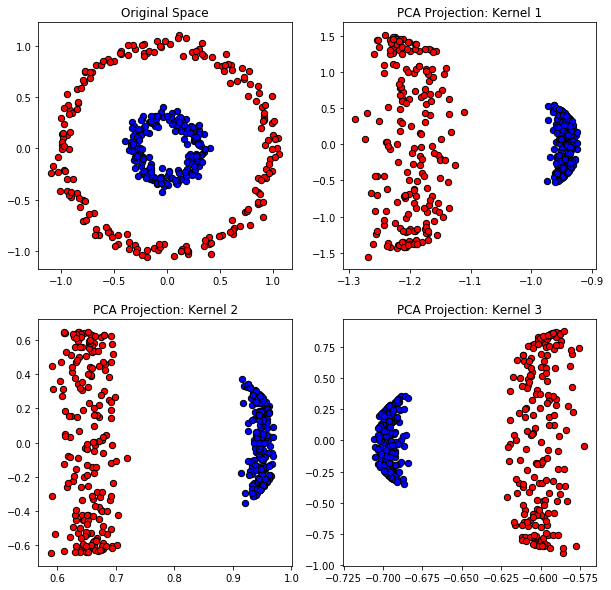

In [55]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds  = y == 0
blues = y == 1

fig, ax = plt.subplots(2, 2, figsize=(10,10))

# Plot original data
ax[0,0].scatter(X[reds, 0], X[reds, 1], c="red",s=40, edgecolor='k');
ax[0,0].scatter(X[blues, 0], X[blues, 1], c="blue",s=40, edgecolor='k');
ax[0,0].set_title("Original Space");

reds  = y == 0  # Color by labels
blues = y == 1

# plot the various projections by kernel PCA
for ii, k in enumerate([k2, k3, k4]):
    ii += 1
    vals, vecs, K = kpca(X,k);  # Perform Kernel PCA, return K matrix and eigenvecs/vals
    X_kpca = K@vecs;   
    
    ax[ii//2, ii%2].set_title('PCA Projection: Kernel %d'%(ii+1))
    ax[ii//2, ii%2].scatter(X_kpca[blues, 0], X_kpca[blues, 1],c="blue",s=40,edgecolor='k')
    ax[ii//2, ii%2].scatter(X_kpca[reds, 0], X_kpca[reds, 1],c="red",s=40,edgecolor='k');

/home/kearns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


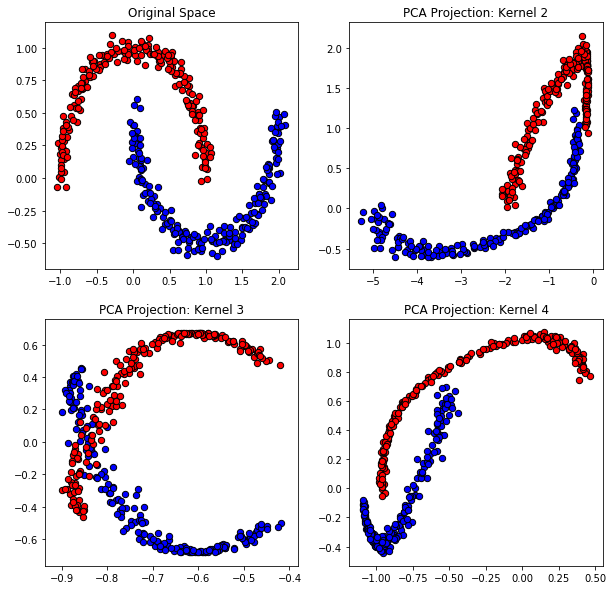

In [61]:
X, y = make_moons(n_samples=400, noise=.05)
reds  = y == 0
blues = y == 1

fig, ax = plt.subplots(2, 2, figsize=(10,10))

# Plot original data
ax[0,0].scatter(X[reds, 0], X[reds, 1], c="red",s=40, edgecolor='k');
ax[0,0].scatter(X[blues, 0], X[blues, 1], c="blue",s=40, edgecolor='k');
ax[0,0].set_title("Original Space");

reds  = y == 0  # Color by labels
blues = y == 1

# plot the various projections by kernel PCA
for ii, k in enumerate([k2, k3, k4]):
    ii += 1
    vals, vecs, K = kpca(X,k);  # Perform Kernel PCA, return K matrix and eigenvecs/vals
    X_kpca = K@vecs;   
    
    ax[ii//2, ii%2].set_title('PCA Projection: Kernel %d'%(ii+1))
    ax[ii//2, ii%2].scatter(X_kpca[blues, 0], X_kpca[blues, 1],c="blue",s=40,edgecolor='k')
    ax[ii//2, ii%2].scatter(X_kpca[reds, 0], X_kpca[reds, 1],c="red",s=40,edgecolor='k');